### Importing Library and Dataset

In [1]:
#import library
import pandas as pd
pd.options.display.max_columns=50
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [3]:
#Show the number of rows and columns
print("Number of rows: ",df_load.shape[0])
print("Number of columns: ",df_load.shape[1])

Number of rows:  7113
Number of columns:  22


In [4]:
#Show top 5 data
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Filtering Specific Format Customer ID Numbers

In [5]:
#count the number of rows of Customer ID
df_load.customerID.count()

7113

In [6]:
#filter ID numbers
'''
1. The character length is 11-12.
2. Consists of numbers only, no characters other than numbers are allowed
3. Starting with the number 45.
'''

df_load['valid_id']=df_load['customerID'].astype('str').str.match('^(45)[0-9]{9,10}$')

In [7]:
#remove invalid ID
df_load=(df_load[df_load['valid_id']==True]).drop('valid_id',axis=1)

In [8]:
#show the number of IDs
print('number of valid IDs:',df_load.customerID.count())

number of valid IDs: 7006


### Filtering Duplicate Customer ID Numbers

In [9]:
#drop duplicate rows
df_load=df_load.drop_duplicates()
print("number of rows:",df_load.shape[0])

number of rows: 6999


In [10]:
#drop duplicate ID sorted by periode
df_load=df_load.drop_duplicates(subset=['customerID']).sort_values(by='UpdatedAt',ascending=False)
print("number of customer ID: ",df_load['customerID'].count())

number of customer ID:  6993


### Handling Missing Values by Eliminating Rows

In [11]:
#check for missing values in the churn column
print('total missing values:',df_load['Churn'].isnull().sum())

total missing values: 43


In [12]:
#dropping all rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)
print("total rows data after deleting the Missing Values: ",df_load.shape[0])


total rows data after deleting the Missing Values:  6950


### Handling Missing Values by Filling in certain Values

In [13]:
#show the number of missing values
df_load.isnull().sum().sort_values(ascending=False)

tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

In [14]:
# handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)
    
print("\nThe number of missing values after imputing the data is:")
print(df_load.isnull().sum().sort_values(ascending=False))


The number of missing values after imputing the data is:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64


### Detecting Outliers (Boxplot)

In [15]:
#display data summary statistics
df_load.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6950.0,6950.000000,6950.000000,6950.000000,6950.000000
mean,202006.0,0.162302,32.477266,65.783741,2305.083460
std,0.0,0.368754,25.188910,50.457871,2578.651143
min,202006.0,0.000000,0.000000,0.000000,19.000000
25%,202006.0,0.000000,9.000000,36.462500,406.975000
50%,202006.0,0.000000,29.000000,70.450000,1400.850000
75%,202006.0,0.000000,55.000000,89.850000,3799.837500
max,202006.0,1.000000,500.000000,2311.000000,80000.000000


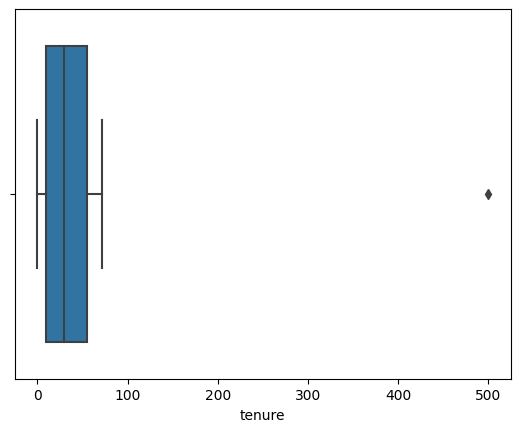

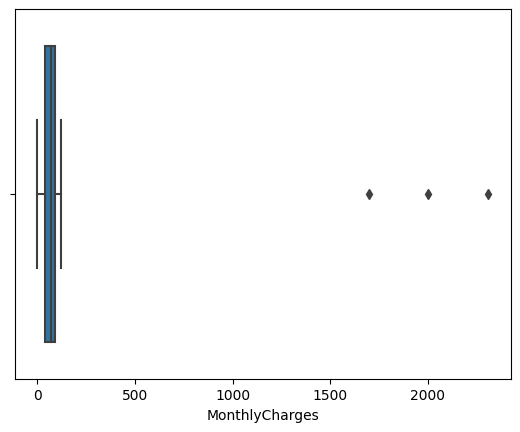

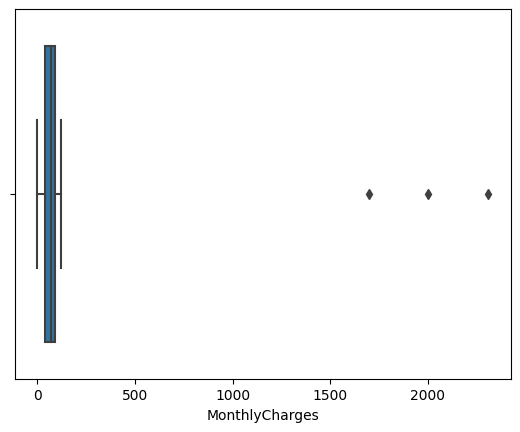

In [16]:
#display the outliers in the tenure, MonthlyCharges, and MonthlyCharges columns, using the boxplot
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

### Handling Outliers

In [17]:
#calculate Q1, Q2, Q3 and IQR.
Q1=df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25)
Q3=df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75)
IQR=Q3-Q1

print('\nQ1 25 percentile of the given data is')
print(Q1)
print('\nQ3 75 percentile of the given data is')
print(Q3)
print('\nInterquartile range is')
print(IQR)


Q1 25 percentile of the given data is
tenure              9.0000
MonthlyCharges     36.4625
TotalCharges      406.9750
Name: 0.25, dtype: float64

Q3 75 percentile of the given data is
tenure              55.0000
MonthlyCharges      89.8500
TotalCharges      3799.8375
Name: 0.75, dtype: float64

Interquartile range is
tenure              46.0000
MonthlyCharges      53.3875
TotalCharges      3392.8625
dtype: float64


In [18]:
maximum=Q3+1.5*IQR
minimum=Q1+1.5*IQR

print('Maximum values:')
print(maximum)
print('\nMinimum values:')
print(minimum)

Maximum values:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Minimum values:
tenure              78.00000
MonthlyCharges     116.54375
TotalCharges      5496.26875
dtype: float64


In [19]:
#filtering data by maximum and minimum values
more_than=df_load>maximum
lower_than=df_load<minimum

df_load=df_load.mask(more_than,other=maximum,axis=1)
df_load=df_load.mask(lower_than,other=minimum,axis=1)

C:\Users\win10\AppData\Local\Temp\ipykernel_6300\818532294.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than=df_load>maximum
C:\Users\win10\AppData\Local\Temp\ipykernel_6300\818532294.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than=df_load<minimum


In [20]:
#distribution of data after handling outliers
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,78.006619,116.568674,5657.372147
std,0.551779,1.110064,510.191559
min,78.000000,116.543750,5496.268750
25%,78.000000,116.543750,5496.268750
50%,78.000000,116.543750,5496.268750
75%,78.000000,116.543750,5496.268750
max,124.000000,169.931250,8889.131250


### Standardizing Values

#### Detecting Non-Standard Values

In [21]:
#display unique values
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService',
					  'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
					  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
	print('\nUnique Values Count \033[1m'+'Before Standardized \033[0mVariable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Before Stand

#### Standardizing Categorical Variables

In [22]:
#replace with its standard value
df_load = df_load.replace(['Laki-Laki', 'Wanita', 'Iya', 'Churn'],
                          ['Male', 'Female', 'Yes', 'Yes'])


In [23]:
#display Unique Values After Standardized
for col_name in list(['gender','Dependents','Churn']):
	print('\nUnique Values Count \033[1m'+'After Standardized \033[0mVariable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64
